In [73]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой 
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns

In [74]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [75]:
data.fillna(0, inplace=True)
data = data.replace ( r'^\s\*$' , 0 , regex= True )
data = data.replace ( r' ' , 0 , regex= True )

In [76]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [78]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='income'>

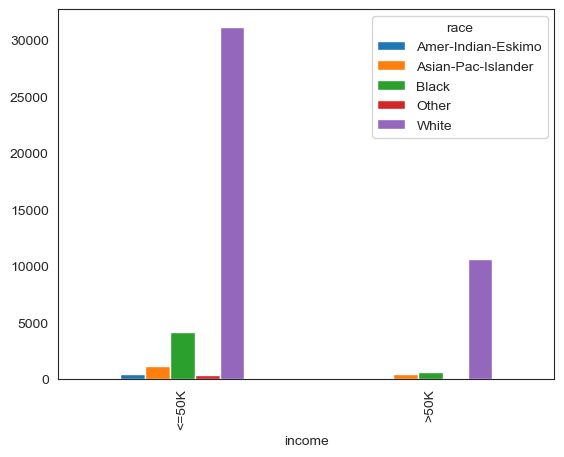

In [79]:
df = pd.pivot_table(data, index = ['income'], columns = ['race'], values = 'occupation', aggfunc = 'count')
df.fillna(0)
df.plot(kind='bar')

<Axes: xlabel='income'>

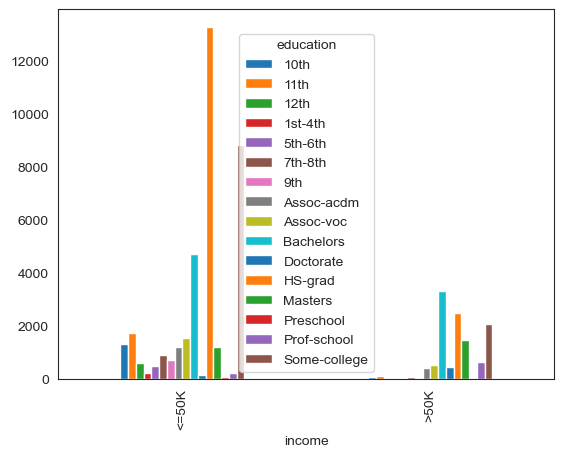

In [80]:
df = pd.pivot_table(data, index = ['income'], columns = ['education'], values = 'occupation', aggfunc = 'count')
df.fillna(0)
df.plot(kind='bar')

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
# попробуем выбрать какие-нибудь признаки, для начала
selectedColumns = data [['race', 'age','income']]

# столбец race - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies (selectedColumns, columns = ['race'])

del X['income']

print('Пометили рассу единичкой')
X.head()

Пометили рассу единичкой


,age,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,0,0,1,0,0
1,38,0,0,0,0,1
2,28,0,0,0,0,1
3,44,0,0,1,0,0
4,18,0,0,0,0,1


In [83]:
# целевая переменная (столбец income) снова является категориальной 
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
le.fit( data['income'])

LabelEncoder()

In [85]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [86]:
le.transform( ['<=50K', '>50K', '<=50K'])

array([0, 1, 0])

In [87]:
y = pd.Series (data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [88]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [89]:
model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [92]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 0])

In [93]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
model.predict_proba(X_test)

array([[0.61607808, 0.38392192],
       [0.9173168 , 0.0826832 ],
       [0.72679276, 0.27320724],
       ...,
       [0.84267941, 0.15732059],
       [0.87549901, 0.12450099],
       [0.65214148, 0.34785852]])

In [95]:
model.score(X_train, y_train) 

0.745143705371996

In [96]:
model.score(X_test,y_test)

0.752379977479783

In [ ]:
#таким образом точность модели ЛР 0.75

In [ ]:
#тестируем svc

In [97]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [98]:
clf.score(X_train, y_train) 

0.7595014460113122

In [99]:
clf.score(X_test, y_test)

0.7655850138192241

In [100]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [101]:
svc.score(X_train, y_train)

0.7595014460113122

In [102]:
svc.score(X_test, y_test)

0.7655850138192241

In [ ]:
#SVC модель более точная, для этого задания подходит лучше